In [3]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk(r'C:\Users\ELAKKIYA K\Desktop\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1).jpeg
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1).jpg
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (10).jpg
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (100).jpg
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1000).JPG
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1001).JPG
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1002).JPG
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1003).JPG
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1004).JPG
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1005).JPG
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1006).JPG
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1007).JPG
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1008).JPG
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1009).JPG
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (101).jpg
C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (1010).JPG
C

In [4]:
import tqdm as tqdm
+i
mport cv2 as cv
iort keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization 
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [5]:
encoder = OneHotEncoder()     
encoder.fit([[0],[1],[2],[3]]) 

OneHotEncoder()

In [14]:
input_path = []
label = []

In [15]:
data = []
paths = []
result = []
fpath = []
for r,d,f in os.walk(r"C:\Users\ELAKKIYA K\Desktop\data\Blight"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(0)
        input_path.append(os.path.join("Blight","Blight",path))
        result.append(encoder.transform([[0]]).toarray())
print(len(paths))

275


In [16]:
paths = []
for r,d,f in os.walk(r"C:\Users\ELAKKIYA K\Desktop\data\Common_Rust"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(1)
        input_path.append(os.path.join("Common_Rust","Common_Rust",path))
        result.append(encoder.transform([[1]]).toarray())
print(len(paths))

114


In [17]:
paths = []
for r,d,f in os.walk(r"C:\Users\ELAKKIYA K\Desktop\data\Gray_Leaf_Spot"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(2)
        input_path.append(os.path.join("Gray_Leaf_Spot","Gray_Leaf_Spot",path))
        result.append(encoder.transform([[2]]).toarray())
print(len(paths))

128


In [18]:
paths = []
for r,d,f in os.walk(r"C:\Users\ELAKKIYA K\Desktop\data\Healthy"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(3)
        input_path.append(os.path.join("Healthy","Healthy",path))
        result.append(encoder.transform([[3]]).toarray())
print(len(paths))

1141


In [19]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  C:\Users\ELAKKIYA K\Desktop\data\Healthy\Corn_...      3
1  C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_B...      0
2  C:\Users\ELAKKIYA K\Desktop\data\Healthy\Corn_...      3
3  C:\Users\ELAKKIYA K\Desktop\data\Healthy\Corn_...      3
4  C:\Users\ELAKKIYA K\Desktop\data\Healthy\Corn_...      3

In [20]:

pd.unique(df['label'])

array([3, 0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='label', ylabel='count'>

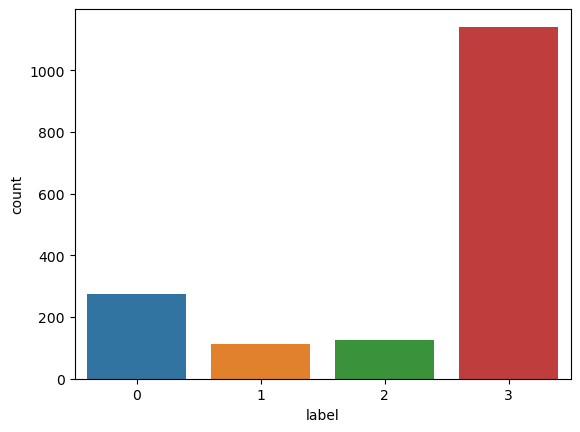

In [22]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import seaborn as sns
sns.countplot(df['label'])

In [23]:

print("Total no.of images are :",len(result))

Total no.of images are : 1653


In [24]:
result = np.array(result)
result = result.reshape(-1,4)

In [25]:
data = np.array(data)
data.shape

(1653, 224, 224, 3)

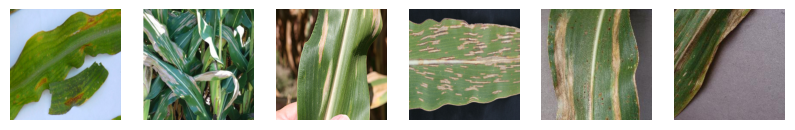

In [26]:
%matplotlib inline
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.axis('off')
plt.show()


In [27]:
x_train , x_test , y_train , y_test = train_test_split(data , result , test_size = 0.25 , shuffle = True , random_state = 100)

In [28]:
print("Shape of an image in x_train : ",x_train[0].shape)
print("Shape of an image in x_test : ",x_test[0].shape)

Shape of an image in x_train :  (224, 224, 3)
Shape of an image in x_test :  (224, 224, 3)


In [29]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [30]:
print("x_train Shape : ", x_train.shape) 
print("x_test Shape : ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape :  (1239, 224, 224, 3)
x_test Shape :  (414, 224, 224, 3)
y_train Shape:  (1239, 4)
y_test Shape:  (414, 4)


In [31]:
modelVGG = VGG16(include_top = False,weights = 'imagenet',classifier_activation = 'softmax',input_shape = (224, 224, 3))

In [32]:
for layer in modelVGG.layers:
    layer.trainable = False

In [34]:
num_classes = 4
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(512,activation='relu')(top_model)
        top_model = Dense(4,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [35]:
num_classes = 4
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input,outputs = FC_Head)

In [36]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [37]:
# summarize filters in each convolutional layer
#from keras.applications.vgg16 import VGG16
#from matplotlib import pyplot
# load the model
#model = VGG16()
# summarize filter shapes
for layer in model.layers:
# check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [38]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

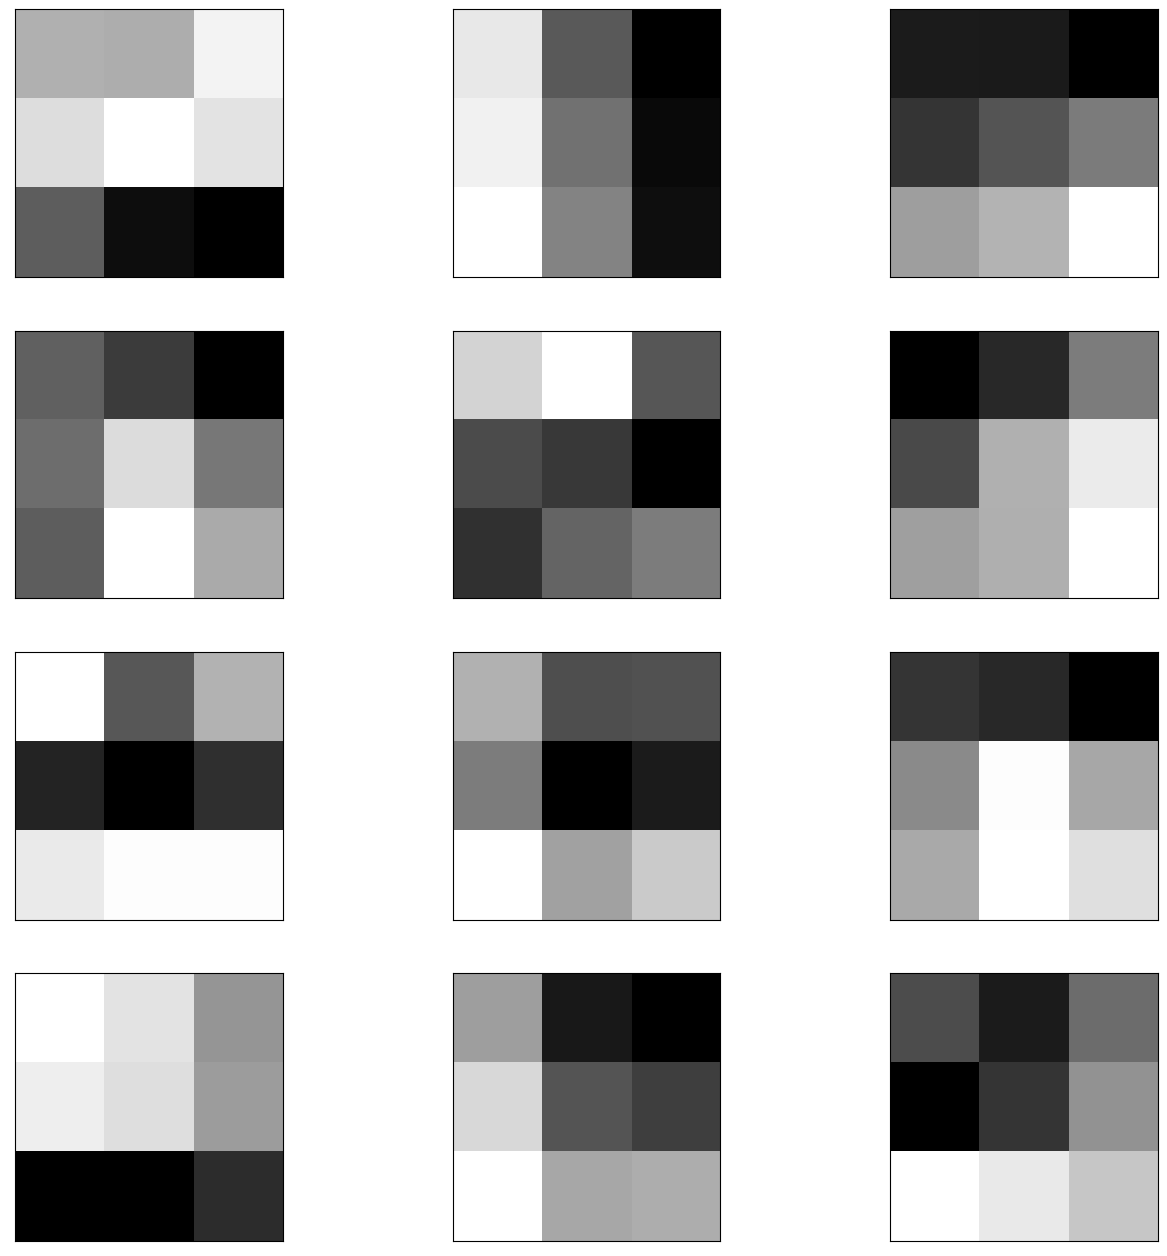

In [39]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(16,16))
nof_filters, ix = 4, 1
for i in range(nof_filters):
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        ax = plt.subplot(nof_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [40]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [41]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)

datagen.fit(x_train)

In [42]:
history = model.fit(x_train , y_train , epochs = 35 , validation_data = (x_test , y_test), verbose = 1)

Epoch 1/35
39/39 [==============================] - 131s 3s/step - loss: 0.8932 - accuracy: 0.8224 - val_loss: 0.2675 - val_accuracy: 0.8865
Epoch 2/35
39/39 [==============================] - 125s 3s/step - loss: 0.1773 - accuracy: 0.9330 - val_loss: 0.3367 - val_accuracy: 0.8720
Epoch 3/35
39/39 [==============================] - 128s 3s/step - loss: 0.1013 - accuracy: 0.9653 - val_loss: 0.3777 - val_accuracy: 0.8696
Epoch 4/35
39/39 [==============================] - 129s 3s/step - loss: 0.0958 - accuracy: 0.9637 - val_loss: 0.4466 - val_accuracy: 0.8841
Epoch 5/35
39/39 [==============================] - 128s 3s/step - loss: 0.0755 - accuracy: 0.9709 - val_loss: 0.4720 - val_accuracy: 0.8720
Epoch 6/35
39/39 [==============================] - 112s 3s/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.4333 - val_accuracy: 0.9034
Epoch 7/35
39/39 [==============================] - 111s 3s/step - loss: 0.0896 - accuracy: 0.9701 - val_loss: 0.3914 - val_accuracy: 0.8961
Epoch 8/35
39

In [43]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

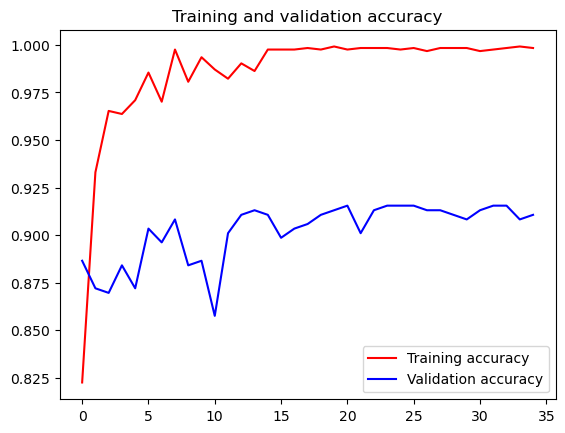

<Figure size 640x480 with 0 Axes>

In [44]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

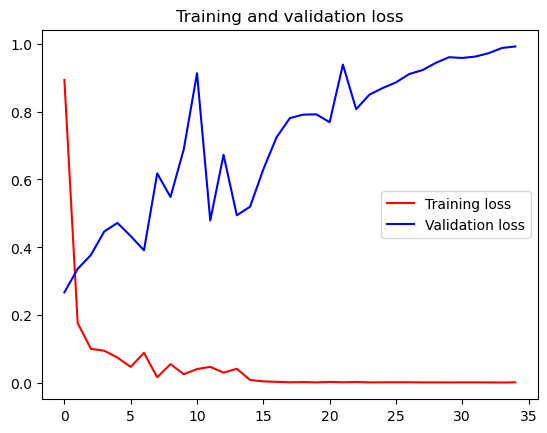

<Figure size 640x480 with 0 Axes>

In [45]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [46]:
Avg_loss=sum(loss)/len(loss)
print(format(Avg_loss,".2f"))

0.05


In [47]:
def names(number):
    if number==0:
        return "It's a leaf with disease BLIGHT"
    elif number==1:
        return "It's a leaf with disease Common Rust"
    elif number==2:
        return "It's a leaf with disease Gray_Leaf_Spot"
    elif number==3:
        return "It's a Healthy leaf"

In [48]:
from matplotlib.pyplot import imshow
def Prediction(img):
    #img = Image.open(r"../input/corn-or-maize-leaf-disease-dataset/data/Blight/Corn_Blight (1010).JPG")
    x = np.array(img.resize((224,224)))
    x = x.reshape(1,224,224,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

99.9990701675415% Confidence It's a Healthy leaf


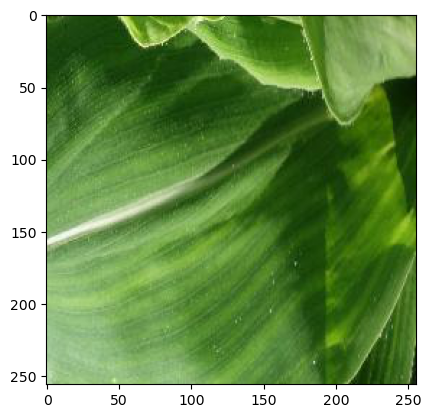

In [49]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Healthy\Corn_Health (7).JPG")
Prediction(img)

100.0% Confidence It's a Healthy leaf


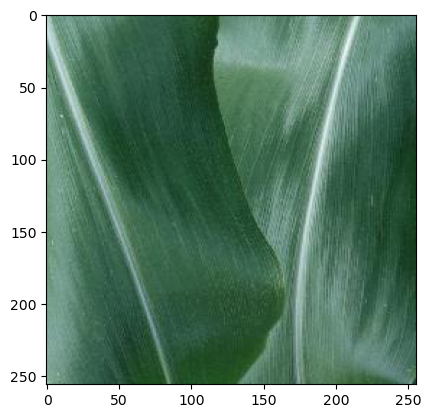

In [50]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Healthy\Corn_Health (9).JPG")
Prediction(img)

100.0% Confidence It's a Healthy leaf


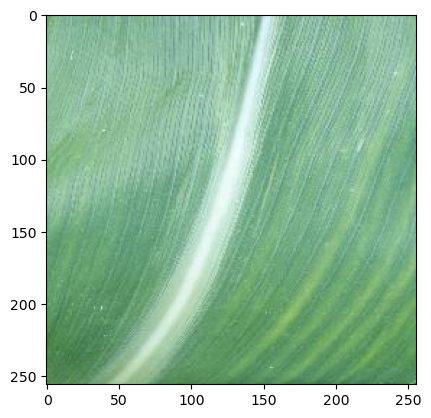

In [51]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Healthy\Corn_Health (100).JPG")
Prediction(img)

100.0% Confidence It's a Healthy leaf


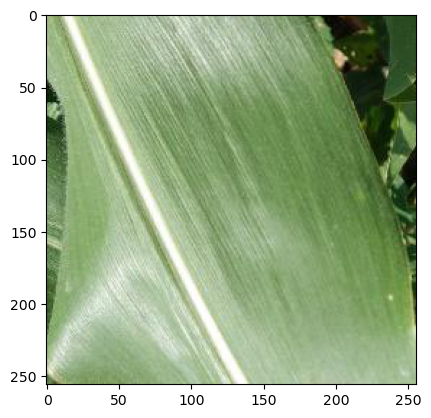

In [52]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Healthy\Corn_Health (999).JPG")
Prediction(img)

100.0% Confidence It's a Healthy leaf


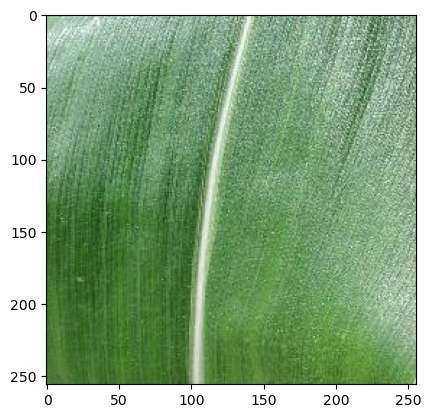

In [53]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Healthy\Corn_Health (1141).JPG")
Prediction(img)

99.99997615814209% Confidence It's a leaf with disease Gray_Leaf_Spot


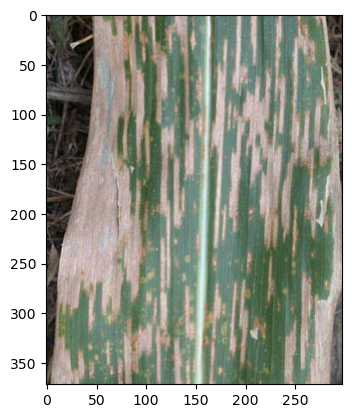

In [54]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Gray_Leaf_Spot\Corn_Gray_Spot (3).JPG")
Prediction(img)

99.9997615814209% Confidence It's a leaf with disease Common Rust


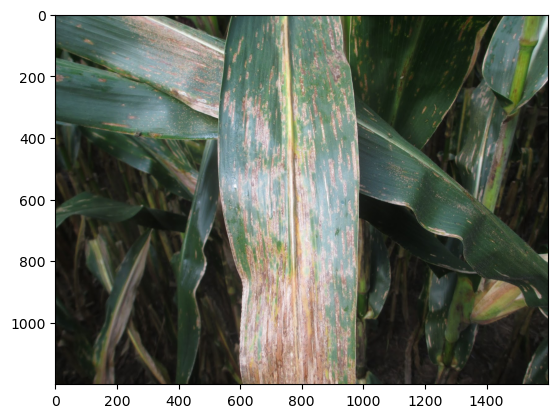

In [55]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Gray_Leaf_Spot\Corn_Gray_Spot (8).JPG")
Prediction(img)

99.16069507598877% Confidence It's a leaf with disease Gray_Leaf_Spot


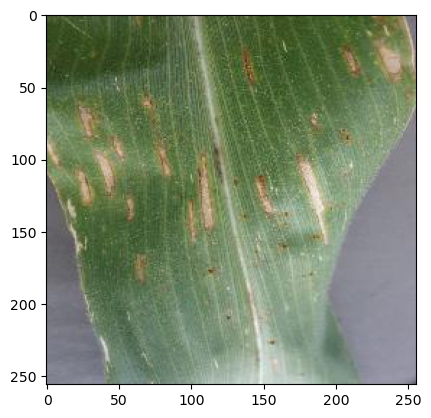

In [57]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Gray_Leaf_Spot\Corn_Gray_Spot (300).JPG")
Prediction(img)

99.99607801437378% Confidence It's a leaf with disease Gray_Leaf_Spot


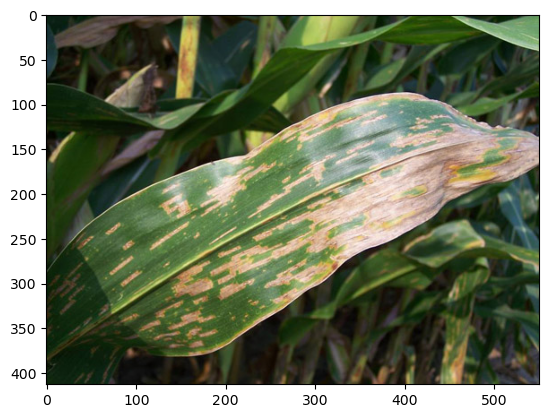

In [58]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Gray_Leaf_Spot\Corn_Gray_Spot (34).JPG")
Prediction(img)

97.97699451446533% Confidence It's a leaf with disease Gray_Leaf_Spot


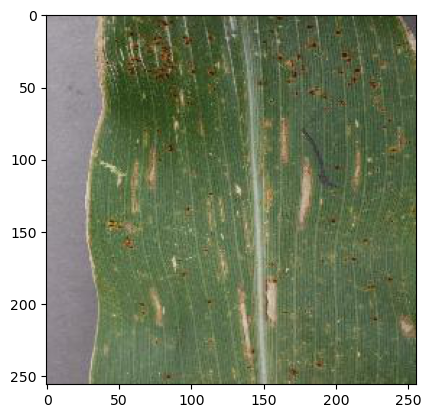

In [59]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Gray_Leaf_Spot\Corn_Gray_Spot (88).JPG")
Prediction(img)

99.99926090240479% Confidence It's a leaf with disease BLIGHT


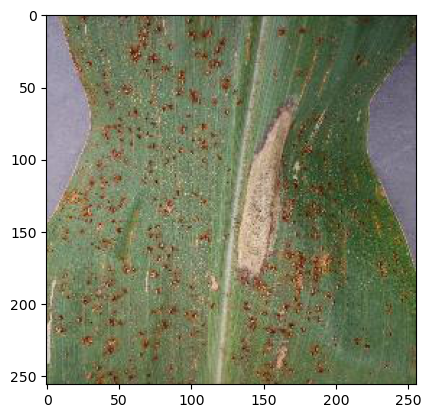

In [60]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (783).JPG")
Prediction(img)

100.0% Confidence It's a leaf with disease BLIGHT


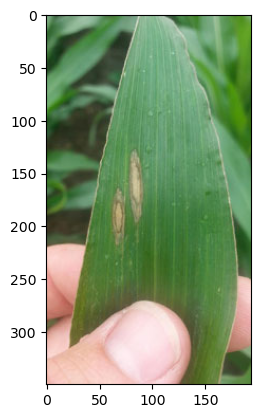

In [61]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (67).JPG")
Prediction(img)

100.0% Confidence It's a leaf with disease BLIGHT


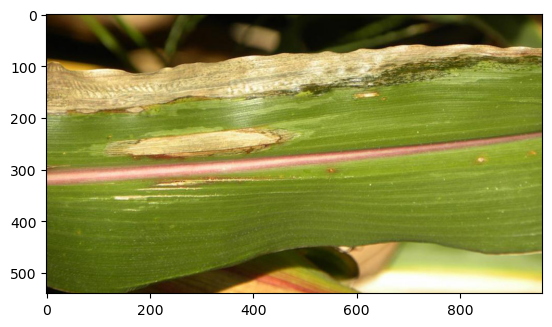

In [62]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (6).JPG")
Prediction(img)

100.0% Confidence It's a leaf with disease BLIGHT


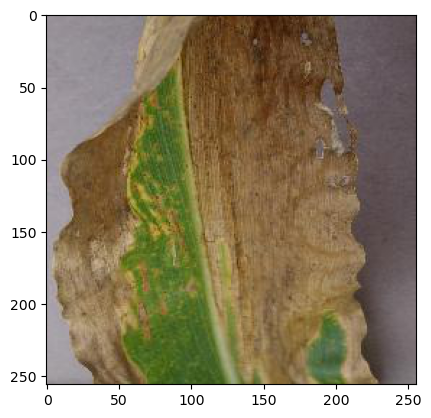

In [63]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (666).JPG")
Prediction(img)

99.82779026031494% Confidence It's a leaf with disease BLIGHT


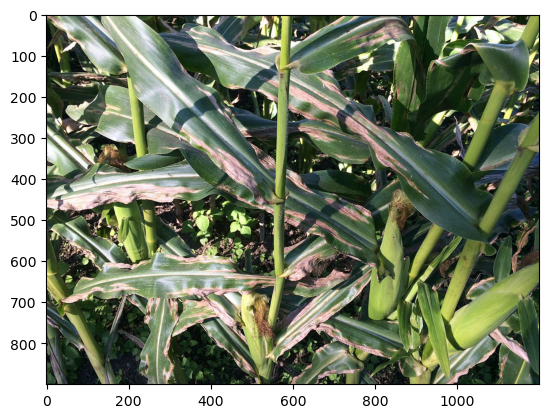

In [64]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (20).JPG")
Prediction(img)

99.99994039535522% Confidence It's a leaf with disease BLIGHT


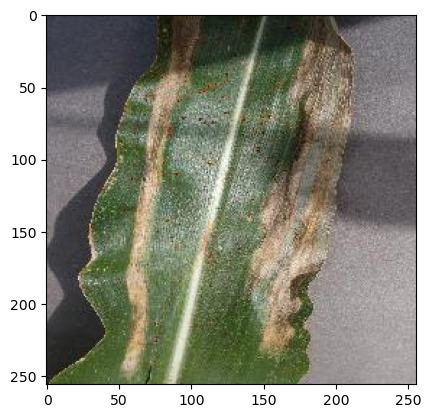

In [67]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Blight\Corn_Blight (444).JPG")
Prediction(img)

100.0% Confidence It's a leaf with disease Common Rust


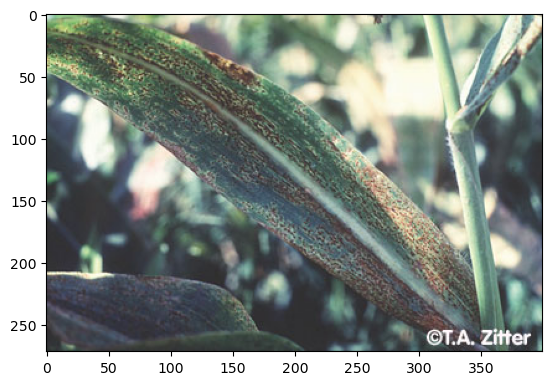

In [71]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Common_Rust\Corn_Common_Rust (41).jpg")
Prediction(img)

100.0% Confidence It's a leaf with disease Common Rust


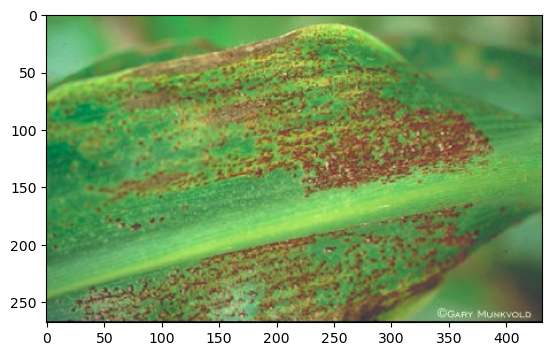

In [72]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Common_Rust\Corn_Common_Rust (4).jpg")
Prediction(img)

100.0% Confidence It's a leaf with disease Common Rust


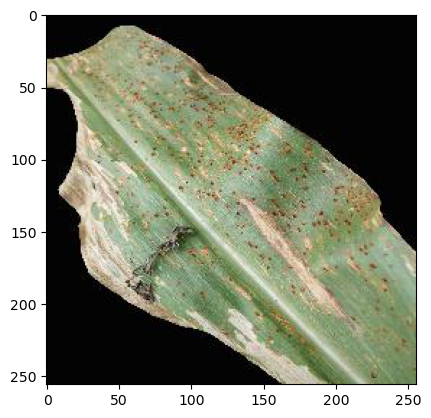

In [73]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Common_Rust\Corn_Common_Rust (100).jpg")
Prediction(img)

78.48722338676453% Confidence It's a leaf with disease Common Rust


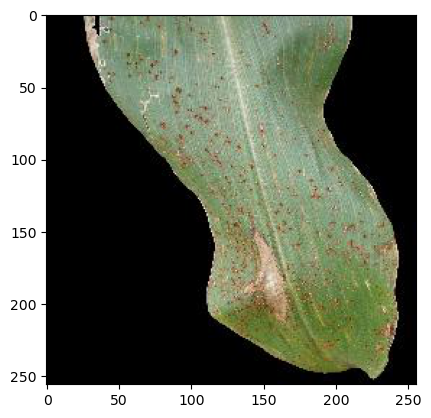

In [74]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Common_Rust\Corn_Common_Rust (467).jpg")
Prediction(img)

52.08154916763306% Confidence It's a leaf with disease BLIGHT


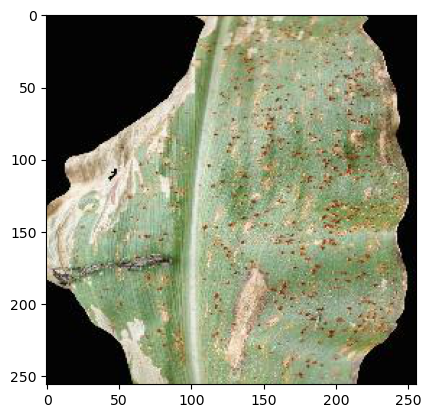

In [81]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Common_Rust\Corn_Common_Rust (99).jpg")
Prediction(img)

99.99984502792358% Confidence It's a leaf with disease Common Rust


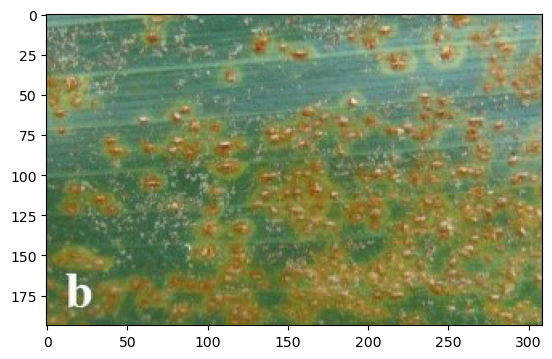

In [76]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Common_Rust\Corn_Common_Rust (67).jpg")
Prediction(img)

94.94203329086304% Confidence It's a leaf with disease Gray_Leaf_Spot


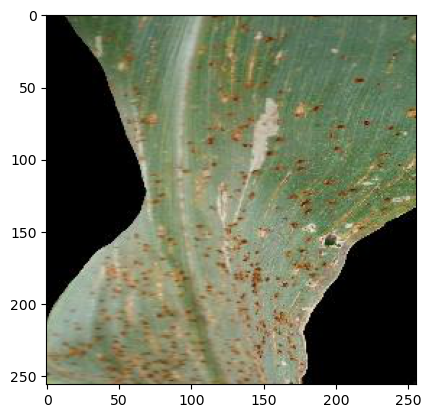

In [77]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Common_Rust\Corn_Common_Rust (600).jpg")
Prediction(img)

59.19027924537659% Confidence It's a leaf with disease BLIGHT


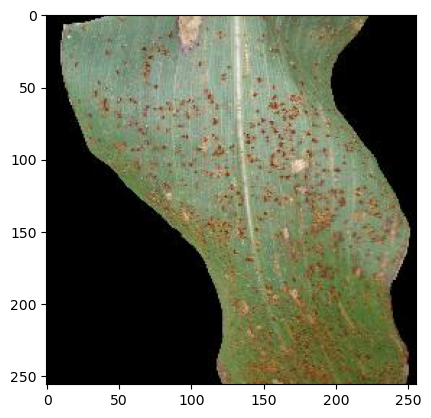

In [78]:
img = Image.open(r"C:\Users\ELAKKIYA K\Desktop\data\Common_Rust\Corn_Common_Rust (999).jpg")
Prediction(img)

In [79]:
print('Max val_acc achieved: %.2f' %(max(history.history['val_accuracy'])*100), '%')
print('Max acc achieved: %.2f' %(max(history.history['accuracy'])*100), '%')

Max val_acc achieved: 91.55 %
Max acc achieved: 99.92 %


In [80]:
print('Final val_acc achieved: %.2f' %(history.history['val_accuracy'][-1]*100), '%')
print('Final acc achieved: %.2f' %(history.history['accuracy'][-1]*100), '%')

Final val_acc achieved: 91.06 %
Final acc achieved: 99.84 %
